# Loading Lib's & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from tqdm import tqdm
from datasets import load_dataset

In [2]:
df = load_dataset("UKPLab/insincere-questions")
df_train = load_dataset('UKPLab/insincere-questions', split= 'train')
df_test = load_dataset('UKPLab/insincere-questions', split= 'test')

README.md:   0%|          | 0.00/163 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/192M [00:00<?, ?B/s]

val.jsonl: 0.00B [00:00, ?B/s]

test.jsonl: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/1256122 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/47500 [00:00<?, ? examples/s]

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


# EDA

In [3]:
df_train.shape, df_test.shape

((1256122, 4), (47500, 4))

In [4]:
df_train = df_train.to_pandas()
df_test = df_test.to_pandas()

In [5]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

qid           0
text          0
labels        0
label_text    0
dtype: int64
qid           0
text          0
labels        0
label_text    0
dtype: int64


In [6]:
df_train.sample(5)

,qid,text,labels,label_text
989590,5ec9abd0cd464d8941f3,Is Micropmax company dying?,0,valid question
497401,1bafd374d7839ac4524b,What all sorts of courses come in fabric desig...,0,valid question
630586,50ea60e3a929f8751a1f,Why American depositary receipt n Indian depos...,0,valid question
986845,a1226b95d0ee4f889a12,"Who said ""I cried when I had no shoes but I st...",0,valid question
624492,40010ba82a90e58970a8,Does high level Zomato foodies charge money fo...,0,valid question


In [7]:
df_train['labels'].value_counts()

,count
labels,
0,1178416
1,77706


# Data Splitting & Traning

In [8]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

print("Shape of training set:", df_train.shape)
print("Shape of validation set:", df_val.shape)

Shape of training set: (1004897, 4)
Shape of validation set: (251225, 4)


In [9]:
x_train = df_train['text']
x_val = df_val['text']
x_test = df_test['text']

y_train = df_train['labels']
y_val = df_val['labels']
y_test = df_test['labels']

# Tokenization

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

max_features = 10000
token = Tokenizer(num_words= max_features)
token.fit_on_texts(list(x_train))

x_train = token.texts_to_sequences(x_train)
x_val = token.texts_to_sequences(x_val)
x_test = token.texts_to_sequences(x_test)

In [11]:
token.word_counts

OrderedDict([('how', 223026),
             ('do', 194466),
             ('you', 150975),
             ('know', 15532),
             ('mobile', 2645),
             ('phones', 756),
             ('in', 290582),
             ('india', 24552),
             ('why', 126063),
             ("marvel's", 36),
             ('movies', 2836),
             ('look', 5885),
             ('kind', 4266),
             ('of', 256420),
             ('ugly', 793),
             ('what', 350592),
             ('is', 340919),
             ('ssc', 1165),
             ('selection', 537),
             ('post', 2688),
             ('exam', 4627),
             ('which', 50525),
             ('we', 30607),
             ('can', 136227),
             ('see', 7430),
             ('on', 72900),
             ('website', 4550),
             ('currently', 1564),
             ('open', 3151),
             ('for', 157518),
             ('applying', 914),
             ('syllabus', 759),
             ('and', 198587),
          

In [12]:
token.word_index

{'the': 1,
 'what': 2,
 'is': 3,
 'a': 4,
 'to': 5,
 'in': 6,
 'of': 7,
 'i': 8,
 'how': 9,
 'and': 10,
 'do': 11,
 'are': 12,
 'for': 13,
 'you': 14,
 'can': 15,
 'why': 16,
 'it': 17,
 'my': 18,
 'that': 19,
 'if': 20,
 'with': 21,
 'on': 22,
 'or': 23,
 'have': 24,
 'be': 25,
 'does': 26,
 'from': 27,
 'your': 28,
 'an': 29,
 'which': 30,
 'should': 31,
 'when': 32,
 'get': 33,
 'best': 34,
 'would': 35,
 'as': 36,
 'people': 37,
 'some': 38,
 'there': 39,
 'who': 40,
 'will': 41,
 'like': 42,
 'at': 43,
 'not': 44,
 'about': 45,
 'by': 46,
 'they': 47,
 'did': 48,
 'was': 49,
 'any': 50,
 'we': 51,
 'so': 52,
 'good': 53,
 'me': 54,
 'their': 55,
 'one': 56,
 'india': 57,
 'has': 58,
 'after': 59,
 'most': 60,
 'where': 61,
 'make': 62,
 'this': 63,
 'but': 64,
 'more': 65,
 'all': 66,
 'think': 67,
 'many': 68,
 'between': 69,
 'time': 70,
 'than': 71,
 'much': 72,
 'other': 73,
 'life': 74,
 'someone': 75,
 'use': 76,
 'he': 77,
 'out': 78,
 'way': 79,
 'am': 80,
 'know': 81,
 'u

# Padding Seq

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_val = pad_sequences(x_val, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# LSTM Model

In [14]:
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, LSTM, MaxPooling1D, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import optimizers, callbacks

inp = Input(shape=(max_len,))
model = Embedding(max_features, 200)(inp)
model = LSTM(64, return_sequences= True, name= 'lstm_layer')(model)
model = GlobalMaxPooling1D()(model)
model = Dropout(0.1)(model)
model = Dense(16, activation= 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(1, activation= 'sigmoid')(model)

In [15]:
model = Model(inputs=inp, outputs=model)

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 200)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 100, 64)        │        67,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,068,897 (7.89 MB)

 Trainable params: 2,068,897 (7.89 MB)

 Non-trainable params: 0 (0.00 B)

# Applying RandomUnderSampler

In [16]:
!pip install imbalanced-learn

In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Create a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

# Display the shapes of the original and resampled training data
print("Original training data shape:", x_train.shape)
print("Resampled training data shape:", x_train_resampled.shape)
print("Original training labels shape:", y_train.shape)
print("Resampled training labels shape:", y_train_resampled.shape)

Original training data shape: (1004897, 100)
Resampled training data shape: (124264, 100)
Original training labels shape: (1004897,)
Resampled training labels shape: (124264,)


In [18]:
early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience= 3)
history = model.fit(x_train_resampled, y_train_resampled, batch_size= 8, epochs= 5, validation_data= (x_val, y_val), callbacks= [early_stopping])

Epoch 1/5
15533/15533 ━━━━━━━━━━━━━━━━━━━━ 275s 17ms/step - accuracy: 0.8531 - loss: 0.3473 - val_accuracy: 0.8698 - val_loss: 0.3243
Epoch 2/5
15533/15533 ━━━━━━━━━━━━━━━━━━━━ 260s 17ms/step - accuracy: 0.9009 - loss: 0.2551 - val_accuracy: 0.8774 - val_loss: 0.2957
Epoch 3/5
15533/15533 ━━━━━━━━━━━━━━━━━━━━ 254s 16ms/step - accuracy: 0.9139 - loss: 0.2262 - val_accuracy: 0.8738 - val_loss: 0.3040
Epoch 4/5
15533/15533 ━━━━━━━━━━━━━━━━━━━━ 271s 17ms/step - accuracy: 0.9234 - loss: 0.2015 - val_accuracy: 0.8687 - val_loss: 0.3314
Epoch 5/5
15533/15533 ━━━━━━━━━━━━━━━━━━━━ 253s 16ms/step - accuracy: 0.9342 - loss: 0.1779 - val_accuracy: 0.8655 - val_loss: 0.3456


# Plotting

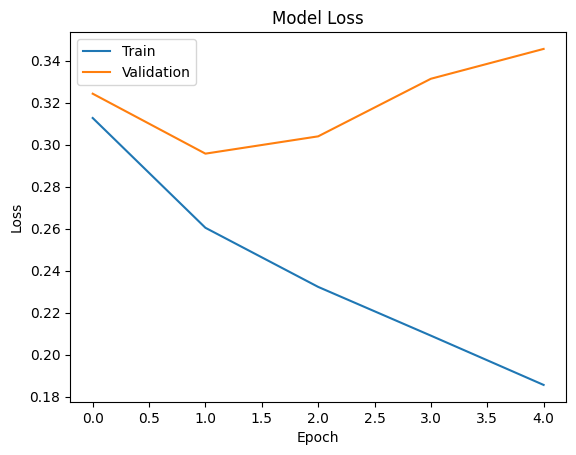

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediction Func

In [20]:
def predict_insincere(text):

  seq = token.texts_to_sequences([text])
  padded_seq = pad_sequences(seq, maxlen=max_len)

  prediction = model.predict(padded_seq)

  if prediction[0] > 0.5:
    return 1
  else:
    return 0

In [21]:
# Test1
test_text = "Is this a sincere question?"
prediction = predict_insincere(test_text)
print(f'The sentence: {test_text} is \n{'Insincere' if prediction == 1 else 'Sincere'}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
The sentence: Is this a sincere question? is 
Insincere


In [22]:
# Test2
test_text_2 = "Why do people hate me?"
prediction_2 = predict_insincere(test_text_2)
print(f'The sentence: {test_text_2} is \n{'Insincere' if prediction_2 == 1 else 'Sincere'}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The sentence: Why do people hate me? is 
Insincere


In [24]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)